In [1]:
# import necessary libararies 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Now import the Charts class
from plots import Charts

# charts = Charts(data)
# charts.correlation_heatmap()


In [4]:
data_benin = pd.read_csv('../data/benin-malanville.csv')

In [5]:
data_benin.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
data_sierra = pd.read_csv('../data/sierraleone-bumbuna.csv')

In [7]:
data_sierra.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [8]:
data_togo = pd.read_csv('../data/togo-dapaong_qc.csv')

In [9]:
data_togo.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [10]:
data_benin.shape

(525600, 19)

# About the 3 csv files 
- They show similar patterns while plotting all numerical features while checking the data.
- So that we will summarise the data and doing the EDA after joining the three data's. 

In [11]:
data_benin['Country'] = 'Benin'
data_togo['Country'] = 'Togo'
data_sierra['Country'] = 'Sierra Leone'


In [12]:
# Combine all three DataFrames into one
data = pd.concat([data_benin, data_togo, data_sierra], ignore_index=True)

In [13]:
data = data.drop('Comments', axis = 1)

In [14]:
data.shape[0]

1576800

In [15]:
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06
mean,2.243573e+02,1.449408e+02,1.151746e+02,2.231257e+02,2.155223e+02,2.741696e+01,6.298333e+01,1.878440e+00,2.576763e+00,4.649840e-01,1.494072e+02,8.771398e+00,9.899963e+02,8.079655e-04,2.697615e-03,3.339823e+01,3.286939e+01
std,3.181073e+02,2.453781e+02,1.580602e+02,3.154732e+02,3.049439e+02,5.131024e+00,2.854366e+01,1.536357e+00,1.961275e+00,2.904002e-01,1.039399e+02,6.790689e+00,1.046797e+01,2.841326e-02,3.803610e-02,1.290953e+01,1.238889e+01
min,-1.950000e+01,-7.800000e+00,-1.790000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.680000e+02,0.000000e+00,0.000000e+00,9.000000e+00,8.100000e+00
25%,-2.200000e+00,-2.000000e-01,-1.400000e+00,0.000000e+00,0.000000e+00,2.370000e+01,3.860000e+01,6.000000e-01,1.100000e+00,4.000000e-01,5.330000e+01,2.900000e+00,9.770000e+02,0.000000e+00,0.000000e+00,2.370000e+01,2.370000e+01
50%,1.200000e+00,0.000000e+00,1.400000e+00,4.100000e+00,4.000000e+00,2.680000e+01,6.900000e+01,1.800000e+00,2.400000e+00,5.000000e-01,1.803000e+02,9.000000e+00,9.940000e+02,0.000000e+00,0.000000e+00,2.830000e+01,2.800000e+01
75%,4.244000e+02,2.270000e+02,2.190000e+02,4.111000e+02,3.973000e+02,3.100000e+01,8.860000e+01,2.800000e+00,3.600000e+00,6.000000e-01,2.342000e+02,1.290000e+01,9.990000e+02,0.000000e+00,0.000000e+00,4.260000e+01,4.190000e+01
max,1.499000e+03,1.004500e+03,8.920000e+02,1.507000e+03,1.473000e+03,4.380000e+01,1.000000e+02,1.950000e+01,2.660000e+01,4.700000e+00,3.600000e+02,9.940000e+01,1.006000e+03,1.000000e+00,2.500000e+00,8.100000e+01,9.460000e+01


## Statistical Summary of the Solar Radiation Measurement Data

The table above provides a statistical summary of the numerical columns in the dataset, including key metrics such as count, mean, standard deviation, minimum, maximum, and quartile values. This summary helps us understand the distribution and range of each variable.

### key insights from the Summary Statistics:

1. **Range and Variability**:
   - The GHI values have a wide range from -19.50 W/m² to 1,499.00 W/m², with significant variability, as indicated by the high standard deviation. The negative values in GHI suggest data quality issues or measurement errors.
   - The temperature and humidity also show a considerable range, reflecting varying weather conditions.

2. **Central Tendency (The 50 percntiles)**:
   - The median values for GHI, DNI, DHI, Tamb, and RH are close to their respective means, indicating a fairly symmetrical distribution for these variables, though the presence of outliers might skew the analysis.

3. **Distribution**:
   - The quartile values provide insight into the spread of the data. For example, GHI and DNI have a large interquartile range (between 25% and 50%), indicating significant variability in solar radiation.

4. **Outliers**:
   - Extreme values, such as negative GHI and DNI readings, should be investigated further. These could be due to sensor errors or specific conditions that need to be understood better.

This statistical summary serves as a foundation for further exploratory data analysis (EDA) by highlighting key characteristics and potential areas for deeper investigation, such as outliers, skewed distributions, and relationships between variables.


In [16]:
orginal_data = data.copy()

In [17]:
# Selecting numerical columns only (excluding 'Timestamp' and any non-numerical columns)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_numerical = data[numerical_columns]


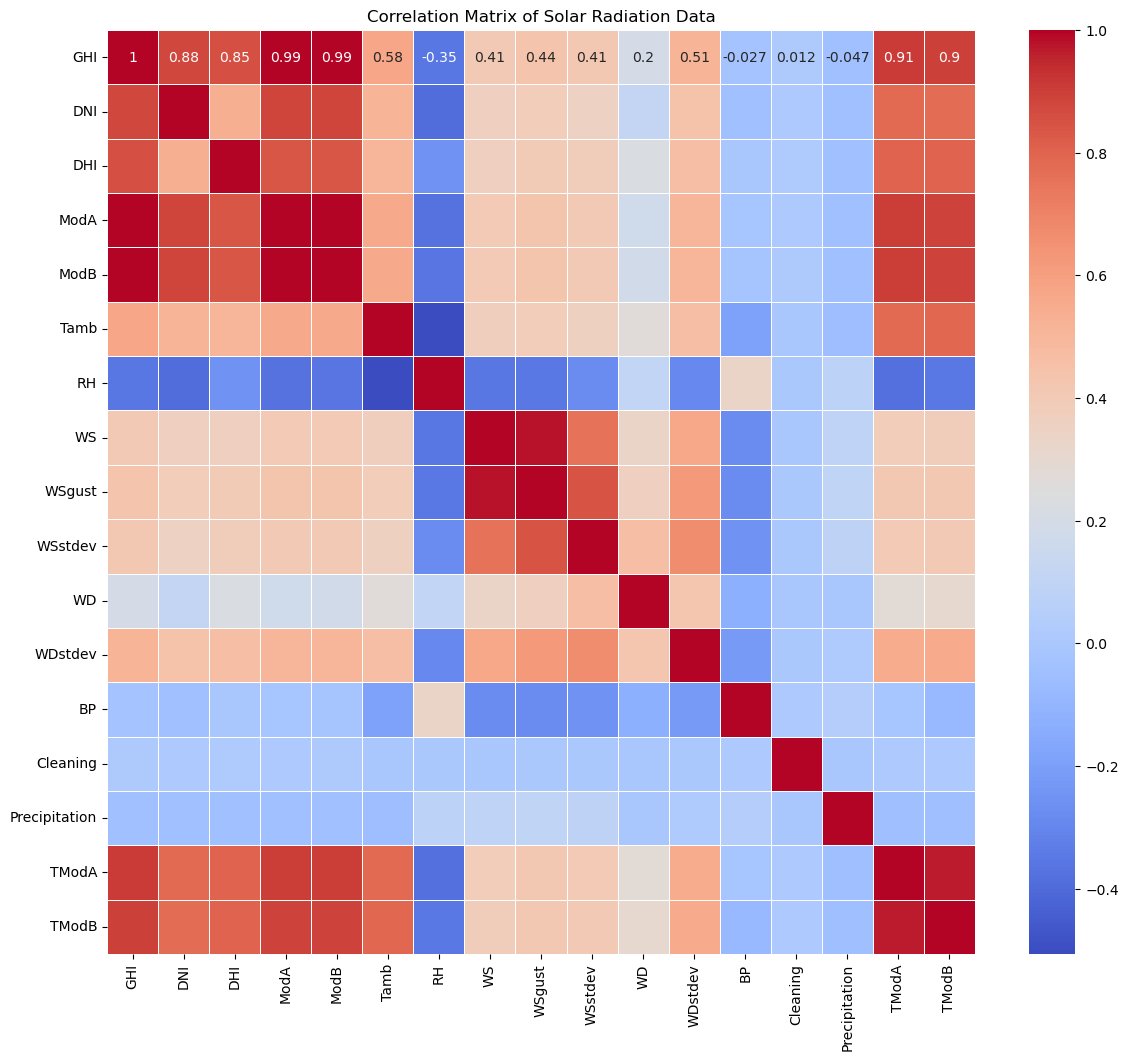

In [18]:
# Calculate the correlation matrix
corr_matrix = data_numerical.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Solar Radiation Data')
plt.show()

### Insights from Correlation Analysis

1. **Positive Correlations**:
   - The variables `'GHI'`, `'DNI'`, `'DHI'`, `'ModA'`, `'ModB'`, `'Tamb'`, `'TModA'`, and `'TModB'` show significant positive correlations with each other. This is expected as these variables are all related to solar radiation and temperature, which tend to increase together.

2. **Negative Correlation with `'RH'`**:
   - `'RH'` (Relative Humidity) is fairly negatively correlated with all other variables. This suggests that higher solar radiation and temperature are associated with lower humidity, which is typical in clear, sunny conditions.

3. **High Correlation between `'TModA'` and `'TModB'`**:
   - `'TModA'` and `'TModB'` have a correlation close to 1, indicating they likely measure similar conditions, possibly due to their proximity or identical setup.

4. **Perfect Correlation between `'GHI'` and `'ModB'`**:
   - The correlation of 1 between `'GHI'` and `'ModB'` suggests that `'ModB'` may be directly measuring `'GHI'` or a closely related variable.


## Data Quality Check 
1. **missing values**:
   - We already deal with it by removing the 'Comments' column from the data frame.
   - All other columns don't have any null value.

2. **Incorrect entries**:
    -Detect values that do not make sense in the context of the data. 

In [19]:
precipitation_negatives = data['Precipitation'][data['Precipitation'] < 0]
precipitation_negatives.shape

(0,)

In [20]:
invalid_cleaning = data['Cleaning'][~data['Cleaning'].isin([0, 1])]
invalid_cleaning.shape

(0,)

In [21]:
ws_negatives = data['WS'][data['WS'] < 0]
wsgust_negatives = data['WSgust'][data['WSgust'] < 0]
print(f' ws negatives: {ws_negatives.shape[0]}')
print(f' ws negatives: {ws_negatives.shape[0]}')

 ws negatives: 0
 ws negatives: 0


In [22]:
charts = Charts(data)


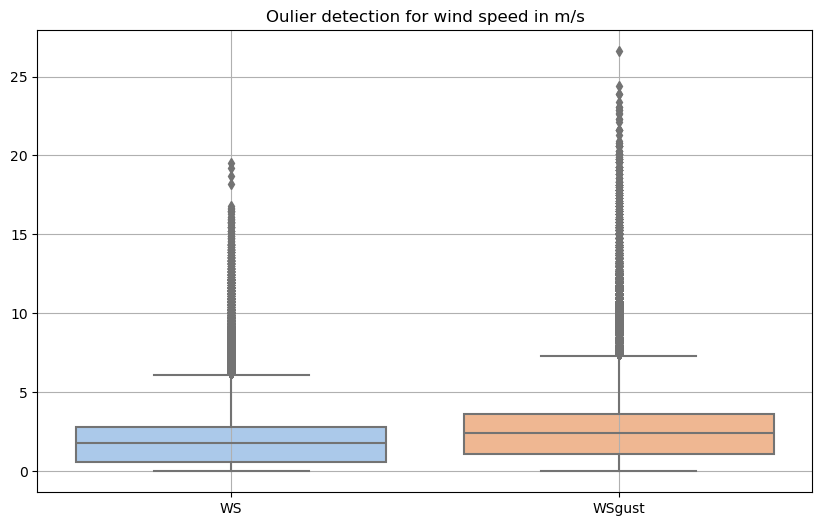

In [23]:
charts.boxplot(column = ['WS', 'WSgust'], title = "Oulier detection for wind speed in m/s")

In [24]:
# RH is a percentage value so let's check if there is invalid values.
rh_out_of_range = data['RH'][(data['RH'] < 0) | (data['RH'] > 100)]
print(f' relative humidity out of range: {rh_out_of_range.shape[0]}')

 relative humidity out of range: 0


 **Solar Radiation Metrics**

- **GHI (W/m²)**: Global Horizontal Irradiance, the total solar radiation received per square meter on a horizontal surface.
- **DNI (W/m²)**: Direct Normal Irradiance, the amount of solar radiation received per square meter on a surface perpendicular to the rays of the sun.
- **DHI (W/m²)**: Diffuse Horizontal Irradiance, solar radiation received per square meter on a horizontal surface that does not arrive on a direct path from the sun.

**Why They Shouldn't Be Negative**
GHI, DNI, and DHI represent the amount of solar energy received per unit area. Since solar energy is a positive quantity (we can't have negative energy received), these values should never be negative. A negative value in these metrics likely indicates a measurement error, faulty sensor, or incorrect data processing. Therefore, it is essential to check for and correct any negative values in these columns to ensure data accuracy.


In [25]:
ghi_negatives = data['GHI'][data['GHI'] < 0]
dni_negatives = data['DNI'][data['DNI'] < 0]
dhi_negatives = data['DHI'][data['DHI'] < 0]
print(f' ghi_negatives: {ghi_negatives.shape[0]}')
print(f' dni_negatives: {dni_negatives.shape[0]}')
print(f' dhi_negatives: {dhi_negatives.shape[0]}')

 ghi_negatives: 777367
 dni_negatives: 542339
 dhi_negatives: 522310


- Above one third of the data is negative.

In [26]:
# check if any of the date time entries are in incorrect data type.
pd.to_datetime(data['Timestamp'], errors='coerce').isnull().sum()


0

3. **Outliers**: 
Look for values that deviate significantly from the rest of the data. Outliers can be caused by errors in data collection or might represent rare, but important, phenomena. 

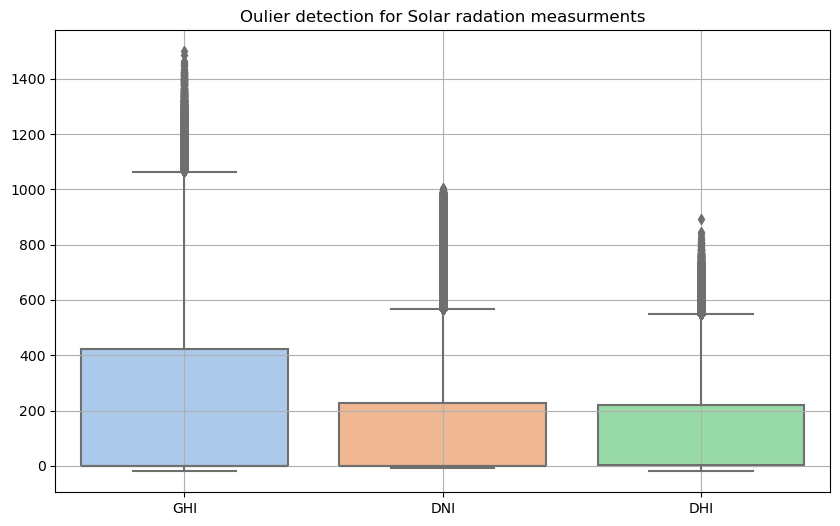

In [27]:
charts.boxplot(column = ['GHI', 'DNI', 'DHI'], title = "Oulier detection for Solar radation measurments")

In [28]:
from scipy.stats import zscore
data[['GHI', 'DNI', 'DHI']].apply(zscore)


,GHI,DNI,DHI
0,-0.709061,-0.591499,-0.735635
1,-0.708746,-0.591499,-0.735635
2,-0.708746,-0.591499,-0.735635
3,-0.708746,-0.591091,-0.735003
4,-0.708432,-0.591091,-0.735003
...,...,...,...
1576795,-0.710318,-0.591091,-0.747023
1576796,-0.710633,-0.591091,-0.747656
1576797,-0.710633,-0.591091,-0.748289
1576798,-0.710633,-0.591499,-0.749554


In [29]:
# Calculate the correlation matrix for solar radiation and temperature components
solar_corr = data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

# Calculate the correlation matrix for wind conditions
wind_corr = data[['WS', 'WSgust', 'WSstdev', 'WDstdev', 'TModA', 'TModB', 'WD']].corr()

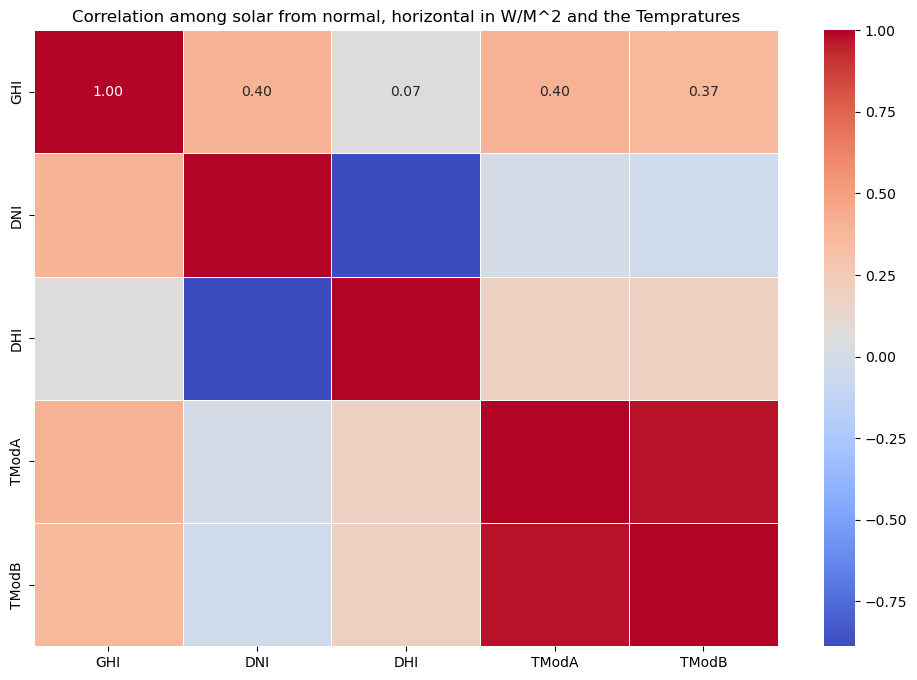

In [30]:
charts = Charts(solar_corr)
charts.correlation_heatmap(title = 'Correlation among solar from normal, horizontal in W/M^2 and the Tempratures')

In [31]:
# scaler = StandardScaler()
# normalized_data = pd.DataFrame(scaler.fit_transform(data[solar_corr]))
# charts = Charts(normalized_data)
# charts.pairplot()

**Correlation result**: 
- 'DHI' and 'GHI' show an almost positive perfect correlation. The total solar radiation received per square meter on a horizontal surface (**GHI**) could be linearly related to the solar radiation received per square meter on a horizontal surface that does not arrive on a direct path from the sun (**DHI**). 
 
- 'TModA' and 'TModB' show perfect positive correlation, so that the conditions that determine their value could be the same.
  The temeprature in both Module.

- The temperature of both modules shows a fairly positive correlation with '**GHI**' and '**DHI**' (Global and Diffuse Horizontal Irradiance) and a negative correlation with '**DNI**' (Diffuse Normal Irradiance). 

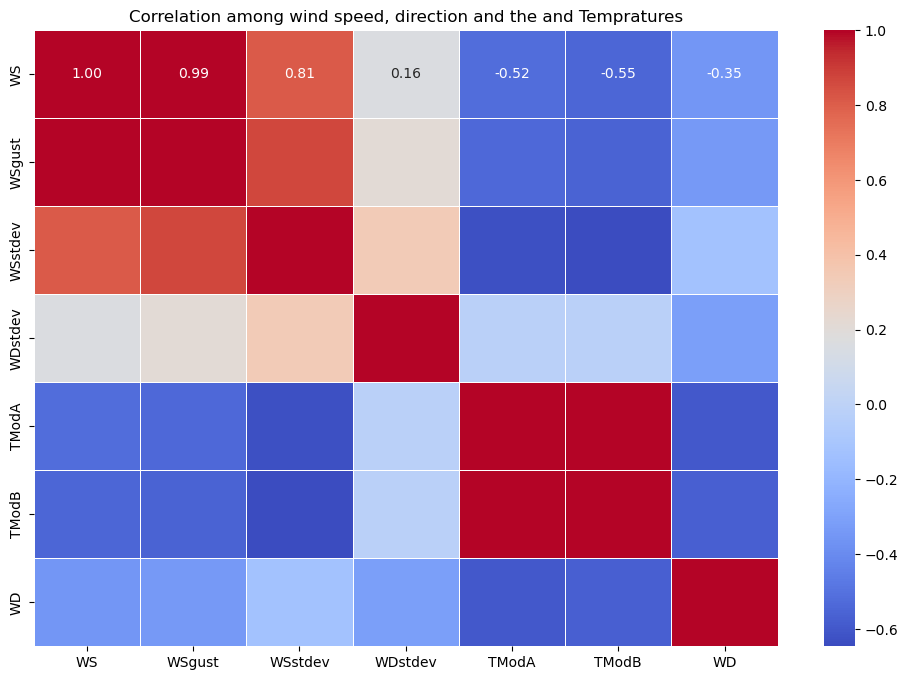

In [32]:
charts = Charts(wind_corr)
charts.correlation_heatmap(title = 'Correlation among wind speed, direction and the and Tempratures')

- 'WS' and 'WSgust' are highly negatively correlated with 'WD'.
- 'TModA' and 'TModB' are negatively correlated with the wind speed and even more strongly correlation with the wind direction. So that means the temperature will not be higher in the direction of the wind or in places where the speed of the wind is higher.

In [33]:
date_column = 'Timestamp'
print(orginal_data[date_column].min(), orginal_data[date_column].max())

2021-08-09 00:01 2022-10-30 00:00


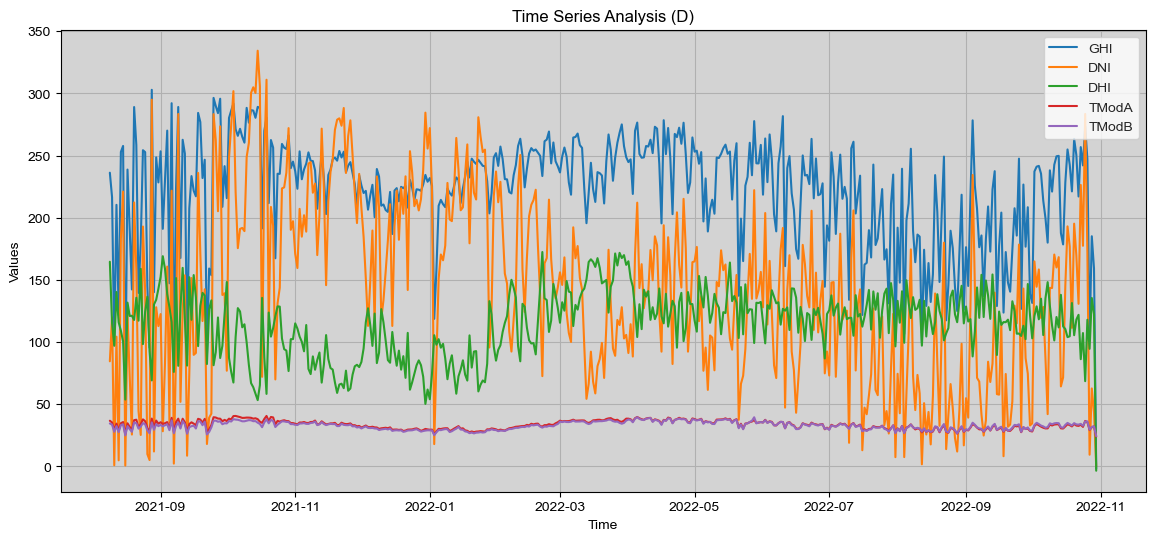

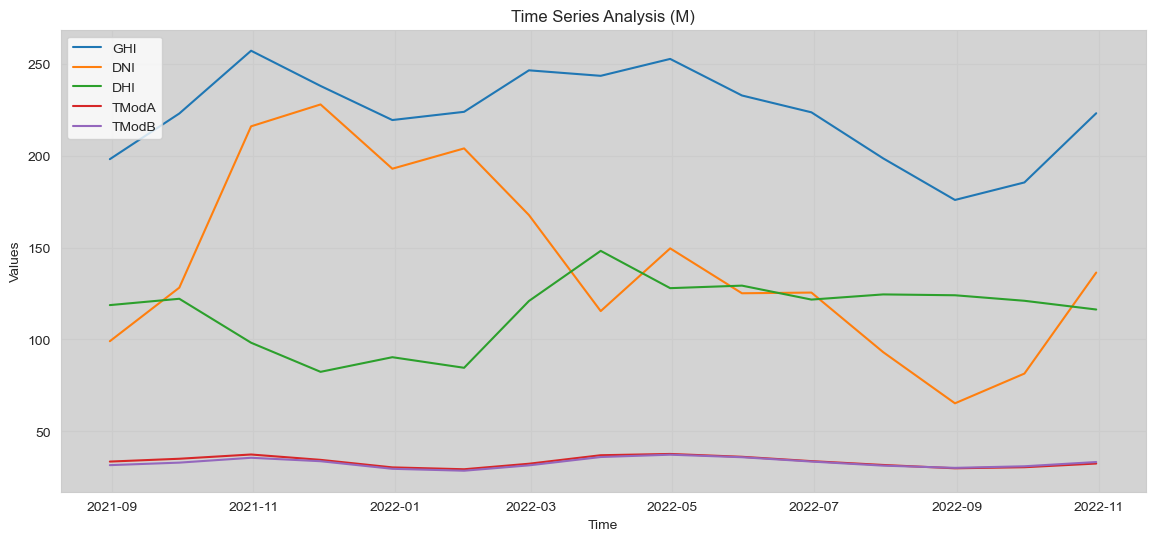

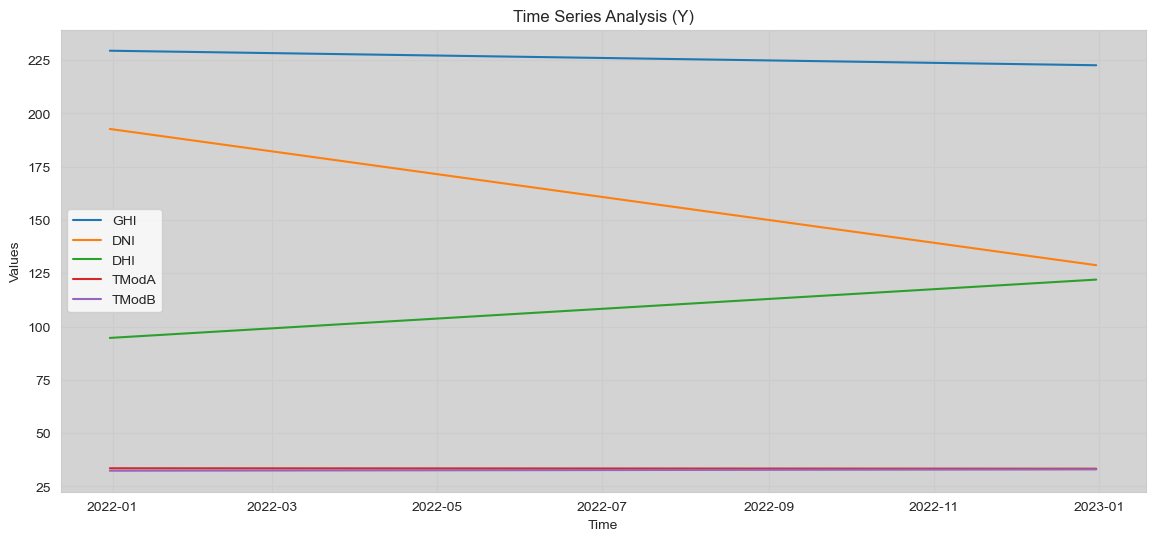

In [34]:
## Time series analysis 
numeric_columns = data.select_dtypes(include = ['float64', 'int64']).columns.to_list()
numeric_columns.append('Timestamp')
data_numeric = data[numeric_columns]
chart = Charts(data_numeric)

chart.time_series_analysis(['GHI', 'DNI', 'DHI', 'TModA', 'TModB'], date_column='Timestamp', aggregations=['D', 'M', 'Y'])